## Importing Libraries

In [1]:
import split_folders
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [5]:
os.listdir('/home/ipc-admin/Documents/NOME/fruit-images-for-object-detection')

['Fruit Classification.ipynb', 'train_zip', '.ipynb_checkpoints', 'test_zip']

Text(0.5, 1.0, 'This is my paper Picture')

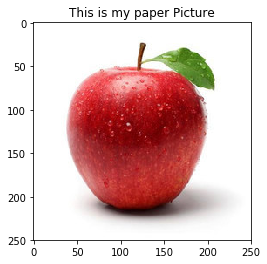

In [12]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/fruit-images-for-object-detection/train_zip/apple/apple_2.jpg')
plt.imshow(test_image)
plt.title('This is my paper Picture')

### Rescaling my data

In [6]:
traindata = ImageDataGenerator(rescale=1./255)
testdata = ImageDataGenerator(rescale=1./255)

### Retrieving Data from train , test and val directory 
### Setting the image size to 64x64 pixels

In [7]:
trainingdata = traindata.flow_from_directory('/home/ipc-admin/Documents/NOME/fruit-images-for-object-detection/train_zip',
                                             batch_size=32,
                                             target_size=(64,64),
                                             class_mode=('categorical') 
                                            )

test_set = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/fruit-images-for-object-detection/test_zip',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 220 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


### Making a Convolutional Neural Network Model

In [8]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'softmax', units = 3))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Feeding Data to the CNN Model

In [9]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 100,
                         epochs = 5,
                         )

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
  5/100 [>.............................] - ETA: 32s - loss: 2.3912 - acc: 0.5521

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  6/100 [>.............................] - ETA: 30s - loss: 2.1809 - acc: 0.5747

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  8/100 [=>............................] - ETA: 28s - loss: 1.8722 - acc: 0.5954

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  9/100 [=>............................] - ETA: 28s - loss: 1.7414 - acc: 0.6149

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 13/100 [==>...........................] - ETA: 26s - loss: 1.4237 - acc: 0.6429

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 16/100 [===>..........................] - ETA: 24s - loss: 1.2362 - acc: 0.6726

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 18/100 [====>.........................] - ETA: 23s - loss: 1.1468 - acc: 0.6899

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 22/100 [=====>........................] - ETA: 23s - loss: 1.0014 - acc: 0.7242

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 26/100 [======>.......................] - ETA: 21s - loss: 0.8911 - acc: 0.7490

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 27/100 [=======>......................] - ETA: 21s - loss: 0.8657 - acc: 0.7567

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 30/100 [========>.....................] - ETA: 20s - loss: 0.7972 - acc: 0.7771

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 32/100 [========>.....................] - ETA: 19s - loss: 0.7602 - acc: 0.7868

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 33/100 [========>.....................] - ETA: 19s - loss: 0.7398 - acc: 0.7932

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 37/100 [==========>...................] - ETA: 18s - loss: 0.6770 - acc: 0.8090

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 38/100 [==========>...................] - ETA: 18s - loss: 0.6620 - acc: 0.8135

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 42/100 [===========>..................] - ETA: 16s - loss: 0.6107 - acc: 0.8269

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 45/100 [============>.................] - ETA: 16s - loss: 0.5759 - acc: 0.8368

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 46/100 [============>.................] - ETA: 15s - loss: 0.5646 - acc: 0.8404

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 50/100 [==============>...............] - ETA: 14s - loss: 0.5264 - acc: 0.8510

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 51/100 [==============>...............] - ETA: 14s - loss: 0.5168 - acc: 0.8539

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 54/100 [===============>..............] - ETA: 13s - loss: 0.4919 - acc: 0.8610

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 60/100 [=================>............] - ETA: 11s - loss: 0.4467 - acc: 0.8746

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 62/100 [=================>............] - ETA: 11s - loss: 0.4336 - acc: 0.8786

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 63/100 [=================>............] - ETA: 10s - loss: 0.4278 - acc: 0.8802

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 64/100 [==================>...........] - ETA: 10s - loss: 0.4215 - acc: 0.8820

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 68/100 [===================>..........] - ETA: 9s - loss: 0.3988 - acc: 0.8885

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 72/100 [====================>.........] - ETA: 8s - loss: 0.3775 - acc: 0.8947

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 76/100 [=====================>........] - ETA: 6s - loss: 0.3589 - acc: 0.9003

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 78/100 [======================>.......] - ETA: 6s - loss: 0.3500 - acc: 0.9028

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 80/100 [=======================>......] - ETA: 5s - loss: 0.3416 - acc: 0.9052

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 83/100 [=======================>......] - ETA: 4s - loss: 0.3299 - acc: 0.9085

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 85/100 [========================>.....] - ETA: 4s - loss: 0.3223 - acc: 0.9107

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 88/100 [=========================>....] - ETA: 3s - loss: 0.3118 - acc: 0.9137

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 92/100 [==========================>...] - ETA: 2s - loss: 0.2986 - acc: 0.9175

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 97/100 [============================>.] - ETA: 0s - loss: 0.2837 - acc: 0.9217

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 98/100 [============================>.] - ETA: 0s - loss: 0.2809 - acc: 0.9225

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


100/100 [==============================] - 29s 290ms/step - loss: 0.2754 - acc: 0.9241
Epoch 2/5


/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  1/100 [..............................] - ETA: 47s - loss: 0.0052 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  6/100 [>.............................] - ETA: 28s - loss: 0.0067 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  7/100 [=>............................] - ETA: 30s - loss: 0.0063 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 11/100 [==>...........................] - ETA: 27s - loss: 0.0067 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 12/100 [==>...........................] - ETA: 26s - loss: 0.0065 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 15/100 [===>..........................] - ETA: 26s - loss: 0.0060 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 17/100 [====>.........................] - ETA: 25s - loss: 0.0057 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 22/100 [=====>........................] - ETA: 23s - loss: 0.0053 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 23/100 [=====>........................] - ETA: 22s - loss: 0.0053 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 24/100 [======>.......................] - ETA: 22s - loss: 0.0052 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 27/100 [=======>......................] - ETA: 21s - loss: 0.0050 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 30/100 [========>.....................] - ETA: 20s - loss: 0.0049 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 33/100 [========>.....................] - ETA: 19s - loss: 0.0047 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 34/100 [=========>....................] - ETA: 19s - loss: 0.0047 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 35/100 [=========>....................] - ETA: 19s - loss: 0.0046 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 36/100 [=========>....................] - ETA: 18s - loss: 0.0045 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 40/100 [===========>..................] - ETA: 17s - loss: 0.0043 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 42/100 [===========>..................] - ETA: 17s - loss: 0.0042 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 45/100 [============>.................] - ETA: 16s - loss: 0.0041 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 50/100 [==============>...............] - ETA: 14s - loss: 0.0038 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 53/100 [==============>...............] - ETA: 13s - loss: 0.0037 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 54/100 [===============>..............] - ETA: 13s - loss: 0.0037 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 55/100 [===============>..............] - ETA: 13s - loss: 0.0037 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 56/100 [===============>..............] - ETA: 12s - loss: 0.0036 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 61/100 [=================>............] - ETA: 11s - loss: 0.0034 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 66/100 [==================>...........] - ETA: 9s - loss: 0.0033 - acc: 1.0000 

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 69/100 [===================>..........] - ETA: 9s - loss: 0.0032 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 70/100 [====================>.........] - ETA: 8s - loss: 0.0032 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 72/100 [====================>.........] - ETA: 8s - loss: 0.0031 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 78/100 [======================>.......] - ETA: 6s - loss: 0.0029 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 79/100 [======================>.......] - ETA: 6s - loss: 0.0029 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 80/100 [=======================>......] - ETA: 5s - loss: 0.0029 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 85/100 [========================>.....] - ETA: 4s - loss: 0.0028 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 87/100 [=========================>....] - ETA: 3s - loss: 0.0027 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 90/100 [==========================>...] - ETA: 2s - loss: 0.0027 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 95/100 [===========================>..] - ETA: 1s - loss: 0.0025 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 98/100 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 99/100 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


100/100 [==============================] - 30s 296ms/step - loss: 0.0024 - acc: 1.0000
Epoch 3/5
  6/100 [>.............................] - ETA: 26s - loss: 5.4344e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  7/100 [=>............................] - ETA: 26s - loss: 5.5575e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  8/100 [=>............................] - ETA: 25s - loss: 5.5974e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 12/100 [==>...........................] - ETA: 24s - loss: 5.5144e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 14/100 [===>..........................] - ETA: 24s - loss: 5.2279e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 17/100 [====>.........................] - ETA: 23s - loss: 5.1341e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 19/100 [====>.........................] - ETA: 22s - loss: 5.0135e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 20/100 [=====>........................] - ETA: 22s - loss: 4.9415e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 26/100 [======>.......................] - ETA: 21s - loss: 4.8274e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 30/100 [========>.....................] - ETA: 20s - loss: 4.6454e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 31/100 [========>.....................] - ETA: 19s - loss: 4.6280e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 38/100 [==========>...................] - ETA: 17s - loss: 4.4143e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 39/100 [==========>...................] - ETA: 17s - loss: 4.3765e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 41/100 [===========>..................] - ETA: 17s - loss: 4.3095e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 42/100 [===========>..................] - ETA: 16s - loss: 4.2723e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 47/100 [=============>................] - ETA: 15s - loss: 4.1157e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 48/100 [=============>................] - ETA: 14s - loss: 4.0765e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 52/100 [==============>...............] - ETA: 13s - loss: 4.0147e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 54/100 [===============>..............] - ETA: 13s - loss: 3.9766e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 55/100 [===============>..............] - ETA: 13s - loss: 3.9435e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 60/100 [=================>............] - ETA: 11s - loss: 3.8109e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 61/100 [=================>............] - ETA: 11s - loss: 3.7943e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 66/100 [==================>...........] - ETA: 9s - loss: 3.7016e-04 - acc: 1.0000 

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 68/100 [===================>..........] - ETA: 9s - loss: 3.6628e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 69/100 [===================>..........] - ETA: 9s - loss: 3.6357e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 70/100 [====================>.........] - ETA: 8s - loss: 3.6064e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 75/100 [=====================>........] - ETA: 7s - loss: 3.5118e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 77/100 [======================>.......] - ETA: 6s - loss: 3.4789e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 78/100 [======================>.......] - ETA: 6s - loss: 3.4596e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 81/100 [=======================>......] - ETA: 5s - loss: 3.4010e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 85/100 [========================>.....] - ETA: 4s - loss: 3.3398e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 87/100 [=========================>....] - ETA: 3s - loss: 3.3107e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 90/100 [==========================>...] - ETA: 2s - loss: 3.2598e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 91/100 [==========================>...] - ETA: 2s - loss: 3.2434e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 94/100 [===========================>..] - ETA: 1s - loss: 3.1993e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 97/100 [============================>.] - ETA: 0s - loss: 3.1537e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


100/100 [==============================] - 29s 292ms/step - loss: 3.1102e-04 - acc: 1.0000
Epoch 4/5
  3/100 [..............................] - ETA: 29s - loss: 1.6869e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  5/100 [>.............................] - ETA: 28s - loss: 1.5522e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  8/100 [=>............................] - ETA: 27s - loss: 1.6414e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 15/100 [===>..........................] - ETA: 25s - loss: 1.5907e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 17/100 [====>.........................] - ETA: 24s - loss: 1.5647e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 18/100 [====>.........................] - ETA: 24s - loss: 1.5923e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 20/100 [=====>........................] - ETA: 23s - loss: 1.5512e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 23/100 [=====>........................] - ETA: 23s - loss: 1.5266e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 24/100 [======>.......................] - ETA: 23s - loss: 1.5171e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 26/100 [======>.......................] - ETA: 22s - loss: 1.4976e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 32/100 [========>.....................] - ETA: 20s - loss: 1.4907e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 34/100 [=========>....................] - ETA: 19s - loss: 1.4751e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 36/100 [=========>....................] - ETA: 18s - loss: 1.4634e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 37/100 [==========>...................] - ETA: 18s - loss: 1.4759e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 41/100 [===========>..................] - ETA: 17s - loss: 1.4366e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 42/100 [===========>..................] - ETA: 17s - loss: 1.4384e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 46/100 [============>.................] - ETA: 15s - loss: 1.4141e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 49/100 [=============>................] - ETA: 14s - loss: 1.4019e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 53/100 [==============>...............] - ETA: 13s - loss: 1.3780e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 56/100 [===============>..............] - ETA: 13s - loss: 1.3744e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 57/100 [================>.............] - ETA: 12s - loss: 1.3691e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 59/100 [================>.............] - ETA: 12s - loss: 1.3523e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 62/100 [=================>............] - ETA: 11s - loss: 1.3452e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 64/100 [==================>...........] - ETA: 10s - loss: 1.3377e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 67/100 [===================>..........] - ETA: 9s - loss: 1.3296e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 71/100 [====================>.........] - ETA: 8s - loss: 1.3088e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 74/100 [=====================>........] - ETA: 7s - loss: 1.2902e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 75/100 [=====================>........] - ETA: 7s - loss: 1.2891e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 78/100 [======================>.......] - ETA: 6s - loss: 1.2807e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 80/100 [=======================>......] - ETA: 5s - loss: 1.2666e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 86/100 [========================>.....] - ETA: 4s - loss: 1.2531e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 88/100 [=========================>....] - ETA: 3s - loss: 1.2493e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 91/100 [==========================>...] - ETA: 2s - loss: 1.2332e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 94/100 [===========================>..] - ETA: 1s - loss: 1.2160e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 96/100 [===========================>..] - ETA: 1s - loss: 1.2089e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 97/100 [============================>.] - ETA: 0s - loss: 1.2062e-04 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


100/100 [==============================] - 30s 296ms/step - loss: 1.1974e-04 - acc: 1.0000


/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Epoch 5/5
  5/100 [>.............................] - ETA: 29s - loss: 8.7996e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


  9/100 [=>............................] - ETA: 27s - loss: 8.2406e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 10/100 [==>...........................] - ETA: 26s - loss: 8.3032e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 13/100 [==>...........................] - ETA: 25s - loss: 8.1093e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 16/100 [===>..........................] - ETA: 23s - loss: 7.7499e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 21/100 [=====>........................] - ETA: 23s - loss: 7.9375e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 24/100 [======>.......................] - ETA: 22s - loss: 7.8937e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 30/100 [========>.....................] - ETA: 20s - loss: 7.8790e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 33/100 [========>.....................] - ETA: 19s - loss: 7.7670e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 34/100 [=========>....................] - ETA: 19s - loss: 7.7060e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 39/100 [==========>...................] - ETA: 18s - loss: 7.6187e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 41/100 [===========>..................] - ETA: 17s - loss: 7.5629e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 45/100 [============>.................] - ETA: 16s - loss: 7.4449e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 47/100 [=============>................] - ETA: 15s - loss: 7.4456e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 51/100 [==============>...............] - ETA: 14s - loss: 7.3754e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 52/100 [==============>...............] - ETA: 14s - loss: 7.3628e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 54/100 [===============>..............] - ETA: 13s - loss: 7.2772e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 57/100 [================>.............] - ETA: 12s - loss: 7.2345e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 59/100 [================>.............] - ETA: 12s - loss: 7.2003e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 61/100 [=================>............] - ETA: 11s - loss: 7.1987e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 63/100 [=================>............] - ETA: 10s - loss: 7.1538e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 65/100 [==================>...........] - ETA: 10s - loss: 7.1230e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 66/100 [==================>...........] - ETA: 10s - loss: 7.1112e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 74/100 [=====================>........] - ETA: 7s - loss: 6.9667e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 75/100 [=====================>........] - ETA: 7s - loss: 6.9506e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 78/100 [======================>.......] - ETA: 6s - loss: 6.9527e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 80/100 [=======================>......] - ETA: 5s - loss: 6.8991e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 83/100 [=======================>......] - ETA: 5s - loss: 6.8314e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 85/100 [========================>.....] - ETA: 4s - loss: 6.7951e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 86/100 [========================>.....] - ETA: 4s - loss: 6.7776e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 89/100 [=========================>....] - ETA: 3s - loss: 6.7451e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 90/100 [==========================>...] - ETA: 2s - loss: 6.7208e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 92/100 [==========================>...] - ETA: 2s - loss: 6.6645e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 93/100 [==========================>...] - ETA: 2s - loss: 6.6383e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


 97/100 [============================>.] - ETA: 0s - loss: 6.6216e-05 - acc: 1.0000

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


100/100 [==============================] - 30s 296ms/step - loss: 6.5854e-05 - acc: 1.0000


### Test Accuracy

In [10]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

/home/ipc-admin/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


The testing accuracy is : 93.93939534577457 %


In [17]:
cnn.save_weights('modelfruit.h5')

### Test Image

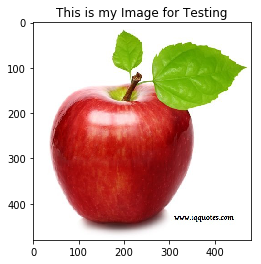

In [13]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/fruit-images-for-object-detection/test_zip/apple/apple_87.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

### Predicting test image

In [14]:
value = cnn.predict_classes(test_image)

In [15]:
value

array([0])

In [16]:
if value==0:
    print("Apple")
elif value==1:
    print("Banana")
elif value==2:
    print("Orange")

Apple
